# Multilayer Perceptron from CIFAR raw data using Keras


## Loading the packages

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [4]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# ... import here the different keras libraries you need

from sklearn.model_selection import train_test_split

%matplotlib inline

## Loading the raw data


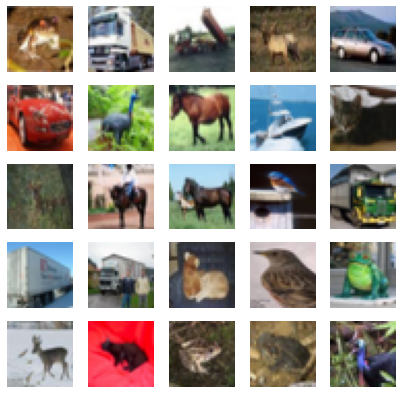

In [10]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

plt.figure(figsize=(7, 7))
show_imgs(X_train)

In [13]:
X_train =  X_train.reshape(X_train.shape[0], -1).astype("float32")
X_test =   X_test.reshape(X_test.shape[0], -1).astype("float32")
X_train /= 255
X_test /=  255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


# One-layer network and weight visualisation
## Define the network

In [35]:
E = 5                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(D,),
                                activation="softmax",
                                kernel_regularizer=tf.keras.regularizers.l2(0.05),
                                bias_regularizer=tf.keras.regularizers.l2(0.05)))

## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [48]:
# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training


model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics="accuracy")

In [49]:
log = model.fit(X_train, y_train, batch_size=B, epochs=E, validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 2s 6ms/step - loss: 1.9931 - accuracy: 0.3304 - val_loss: 1.9871 - val_accuracy: 0.3287
Epoch 2/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9839 - accuracy: 0.3348 - val_loss: 1.9588 - val_accuracy: 0.3514
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9880 - accuracy: 0.3302 - val_loss: 2.0223 - val_accuracy: 0.3064
Epoch 4/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9906 - accuracy: 0.3311 - val_loss: 2.0864 - val_accuracy: 0.3146
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9919 - accuracy: 0.3284 - val_loss: 2.0140 - val_accuracy: 0.3241


## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

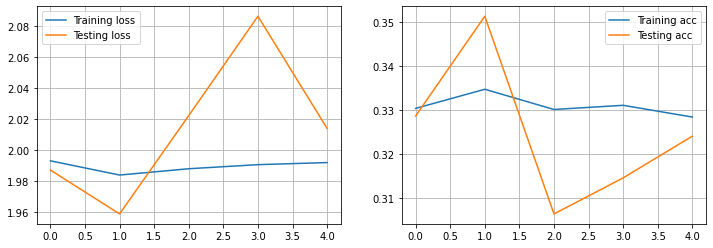

In [50]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [51]:
loss_test, metric_test = model.evaluate(X_test, y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.0042 - accuracy: 0.3293
Test loss: 2.0041606426239014
Test accuracy: 0.3292999863624573


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [53]:
import sklearn.metrics as me

pred = model.predict_classes(X_test, verbose=1)
me.confusion_matrix(y_test, pred)

313/313 [==============================] - 0s 1ms/step


array([[  3,  59,  19,  65,  29,  10,  15, 104, 648,  48],
       [  0, 423,   6,  56,  37,  43,  32,  45, 240, 118],
       [  0,  48,  68, 145, 257,  64,  68,  93, 242,  15],
       [  0,  63,  29, 303,  84, 171,  41, 103, 151,  55],
       [  0,  32,  28, 107, 419,  54,  72, 132, 135,  21],
       [  0,  34,  34, 213, 115, 270,  41, 112, 166,  15],
       [  0,  50,  16, 188, 212,  71, 274,  73,  80,  36],
       [  0,  41,  18,  91, 152,  51,  23, 401, 157,  66],
       [  1,  91,   1,  34,  13,  31,   3,  19, 751,  56],
       [  0, 175,   3,  46,  22,  14,  27,  57, 275, 381]], dtype=int64)

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(3072, 10)
(10,)


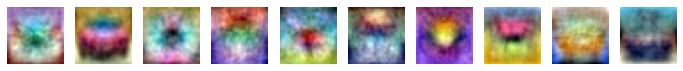

In [61]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = model.get_weights()[0][:, i]
    im = im.reshape((32, 32, 3))                     
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = im.min(axis=0).min(axis=0)
    max = im.max(axis=0).max(axis=0)
    im = (im - min) / (max - min)                      
    im = im * 255                      
    im = im.astype("uint8")                   
    ax.axis('off')
    ax.imshow(im)

# Two-layer network

In [66]:
E = 30              # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(D,), activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics="accuracy")

In [67]:
log = model.fit(X_train, y_train, batch_size=B, epochs=E, validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 3s 11ms/step - loss: 1.9719 - accuracy: 0.2959 - val_loss: 1.8409 - val_accuracy: 0.3412
Epoch 2/30
313/313 [==============================] - 3s 9ms/step - loss: 1.7917 - accuracy: 0.3651 - val_loss: 1.7644 - val_accuracy: 0.3845
Epoch 3/30
313/313 [==============================] - 3s 9ms/step - loss: 1.7245 - accuracy: 0.3919 - val_loss: 1.7236 - val_accuracy: 0.3971
Epoch 4/30
313/313 [==============================] - 3s 9ms/step - loss: 1.6747 - accuracy: 0.4117 - val_loss: 1.6877 - val_accuracy: 0.4161
Epoch 5/30
313/313 [==============================] - 3s 9ms/step - loss: 1.6338 - accuracy: 0.4220 - val_loss: 1.6618 - val_accuracy: 0.4145
Epoch 6/30
313/313 [==============================] - 3s 9ms/step - loss: 1.6103 - accuracy: 0.4325 - val_loss: 1.6654 - val_accuracy: 0.4089
Epoch 7/30
313/313 [==============================] - 3s 9ms/step - loss: 1.5904 - accuracy: 0.4361 - val_loss: 1.6559 - val_accuracy: 0.4138
Epoch

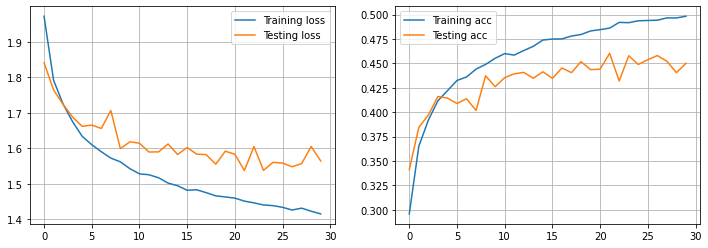

In [68]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [70]:
loss_test, metric_test = model.evaluate(X_test, y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5499 - accuracy: 0.4544
Test loss: 1.5499167442321777
Test accuracy: 0.4544000029563904


## Hyperparameter tuning

[512, 256]
Epoch 1/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.9429 - accuracy: 0.3208 - val_loss: 1.7589 - val_accuracy: 0.3716
Epoch 2/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.6930 - accuracy: 0.3950 - val_loss: 1.6564 - val_accuracy: 0.4104
Epoch 3/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.6328 - accuracy: 0.4164 - val_loss: 1.5805 - val_accuracy: 0.4448
Epoch 4/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.5873 - accuracy: 0.4317 - val_loss: 1.7083 - val_accuracy: 0.3992
Epoch 5/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.5493 - accuracy: 0.4468 - val_loss: 1.5259 - val_accuracy: 0.4605 loss: 1.551
Epoch 6/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.5262 - accuracy: 0.4564 - val_loss: 1.4993 - val_accuracy: 0.4766
Epoch 7/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.4934 - accuracy: 0.46

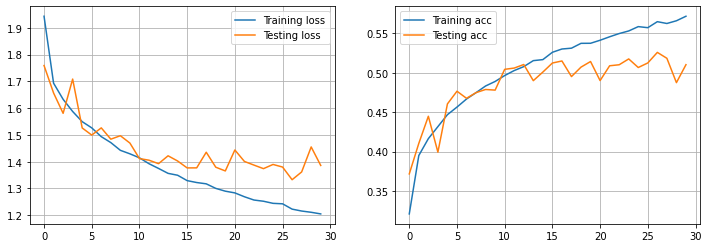

[1024, 512, 256]
Epoch 1/30
1250/1250 [==============================] - 43s 35ms/step - loss: 1.9792 - accuracy: 0.3034 - val_loss: 1.6865 - val_accuracy: 0.3974
Epoch 2/30
1250/1250 [==============================] - 42s 34ms/step - loss: 1.7115 - accuracy: 0.3862 - val_loss: 1.7343 - val_accuracy: 0.3663
Epoch 3/30
1250/1250 [==============================] - 43s 34ms/step - loss: 1.6372 - accuracy: 0.4157 - val_loss: 1.5785 - val_accuracy: 0.4379
Epoch 4/30
1250/1250 [==============================] - 43s 34ms/step - loss: 1.5927 - accuracy: 0.4318 - val_loss: 1.5175 - val_accuracy: 0.4590
Epoch 5/30
1250/1250 [==============================] - 43s 35ms/step - loss: 1.5556 - accuracy: 0.4433 - val_loss: 1.5207 - val_accuracy: 0.4567
Epoch 6/30
1250/1250 [==============================] - 45s 36ms/step - loss: 1.5143 - accuracy: 0.4595 - val_loss: 1.5481 - val_accuracy: 0.4607
Epoch 7/30
1250/1250 [==============================] - 52s 42ms/step - loss: 1.4922 - accuracy: 0.4695 - v

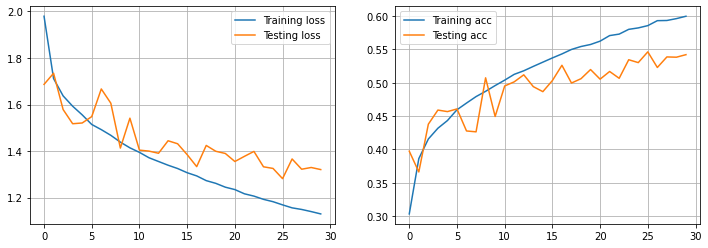

[2048, 1024, 512, 256]
Epoch 1/30
1250/1250 [==============================] - 87s 69ms/step - loss: 2.0096 - accuracy: 0.2893 - val_loss: 1.7767 - val_accuracy: 0.3639
Epoch 2/30
1250/1250 [==============================] - 121s 97ms/step - loss: 1.7247 - accuracy: 0.3824 - val_loss: 1.7106 - val_accuracy: 0.3792
Epoch 3/30
1250/1250 [==============================] - 113s 91ms/step - loss: 1.6399 - accuracy: 0.4127 - val_loss: 1.6196 - val_accuracy: 0.4018
Epoch 4/30
1250/1250 [==============================] - 121s 97ms/step - loss: 1.5916 - accuracy: 0.4308 - val_loss: 1.6958 - val_accuracy: 0.3951
Epoch 5/30
1250/1250 [==============================] - 121s 97ms/step - loss: 1.5110 - accuracy: 0.4651 - val_loss: 1.5330 - val_accuracy: 0.4552
Epoch 7/30
1250/1250 [==============================] - 121s 96ms/step - loss: 1.4513 - accuracy: 0.4860 - val_loss: 1.5403 - val_accuracy: 0.4597
Epoch 9/30
1250/1250 [==============================] - 121s 97ms/step - loss: 1.4182 - accuracy

In [ ]:
E = 30              # number of epochs
B = 32               # batch size


for layers in [
    [512, 256],
    [1024, 512, 256],
    [2048, 1024, 512, 256]
]:
    print(layers)
    model = tf.keras.Sequential()
    for layer in layers:        
        model.add(tf.keras.layers.Dense(layer, activation=None))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation("relu"))
        model.add(tf.keras.layers.Dropout(0.5))
        
        
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics="accuracy")

    log = model.fit(X_train, y_train, batch_size=B, epochs=E, validation_split=0.2)

    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(log.history['loss'], label='Training loss')
    ax1.plot(log.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(log.history['accuracy'], label='Training acc')
    ax2.plot(log.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()
    plt.show()

Epoch 1/50
1250/1250 [==============================] - 36s 29ms/step - loss: 1.9848 - accuracy: 0.3026 - val_loss: 1.7006 - val_accuracy: 0.3899
Epoch 2/50
1250/1250 [==============================] - 44s 35ms/step - loss: 1.7121 - accuracy: 0.3864 - val_loss: 1.6626 - val_accuracy: 0.3991
Epoch 3/50
1250/1250 [==============================] - 46s 37ms/step - loss: 1.6373 - accuracy: 0.4149 - val_loss: 1.6590 - val_accuracy: 0.4068
Epoch 4/50
1250/1250 [==============================] - 46s 37ms/step - loss: 1.5933 - accuracy: 0.4305 - val_loss: 1.7068 - val_accuracy: 0.3978
Epoch 5/50
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5517 - accuracy: 0.4479 - val_loss: 1.4991 - val_accuracy: 0.4645
Epoch 6/50
1250/1250 [==============================] - 46s 37ms/step - loss: 1.5220 - accuracy: 0.4600 - val_loss: 1.6048 - val_accuracy: 0.4368
Epoch 7/50
1250/1250 [==============================] - 46s 36ms/step - loss: 1.4892 - accuracy: 0.4699 - val_loss: 1.4838 -

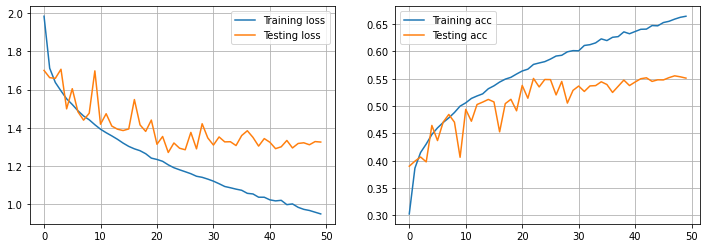

In [78]:
E = 50              # number of epochs
B = 32               # batch size

model = tf.keras.Sequential()
for layer in [1024, 512, 256]:        
    model.add(tf.keras.layers.Dense(layer, activation=None))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics="accuracy")

log = model.fit(X_train, y_train, batch_size=B, epochs=E, validation_split=0.2)

f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()
plt.show()

In [79]:
loss_test, metric_test = model.evaluate(X_test, y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 11s 34ms/step - loss: 1.3057 - accuracy: 0.5529TA: 1s - loss: 1.3087 - accuracy:  -
Test loss: 1.3056830167770386
Test accuracy: 0.5529000163078308
